In [2]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_size = 11632
raw_data = pd.read_csv(f"../data/raw_data/ce_raw_data_{data_size}.csv")

/tmp/ipykernel_6172/3972360842.py:2: DtypeWarning: Columns (57,71) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(f"../data/raw_data/ce_raw_data_{data_size}.csv")


In [5]:
# Exemplo de manipulação de colunas
raw_data.rename(
    columns={
        "listing.pricingInfo.rawPrice": "price",
        "link.data.city": "city",
        "link.data.state": "state",
        "link.data.neighborhood": "neighborhood",
        "listing.usableAreas": "usable_areas",
        "listing.totalAreas": "total_areas",
        "listing.parkingSpaces": "parking_spaces",
        "listing.suites": "suites",
        "listing.bathrooms": "bathrooms",
        "listing.bedrooms": "bedrooms",
    },
    inplace=True,
)

In [6]:
cols_to_select = [
    "price",
    "city",
    "state",
    "neighborhood",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
numeric_cols = [
    "price",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]

In [7]:
data = raw_data[cols_to_select]

In [8]:
data.shape

(11632, 10)

### Check for missing values 

In [9]:
data.nunique()

price             1830
city                 5
state                1
neighborhood       174
usable_areas       647
total_areas        756
parking_spaces      23
suites              13
bathrooms           16
bedrooms            16
dtype: int64

In [10]:
data = data.dropna()

In [11]:
len(data)

8310

In [12]:
for col in numeric_cols:
    data[col] = data[col].astype(int)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

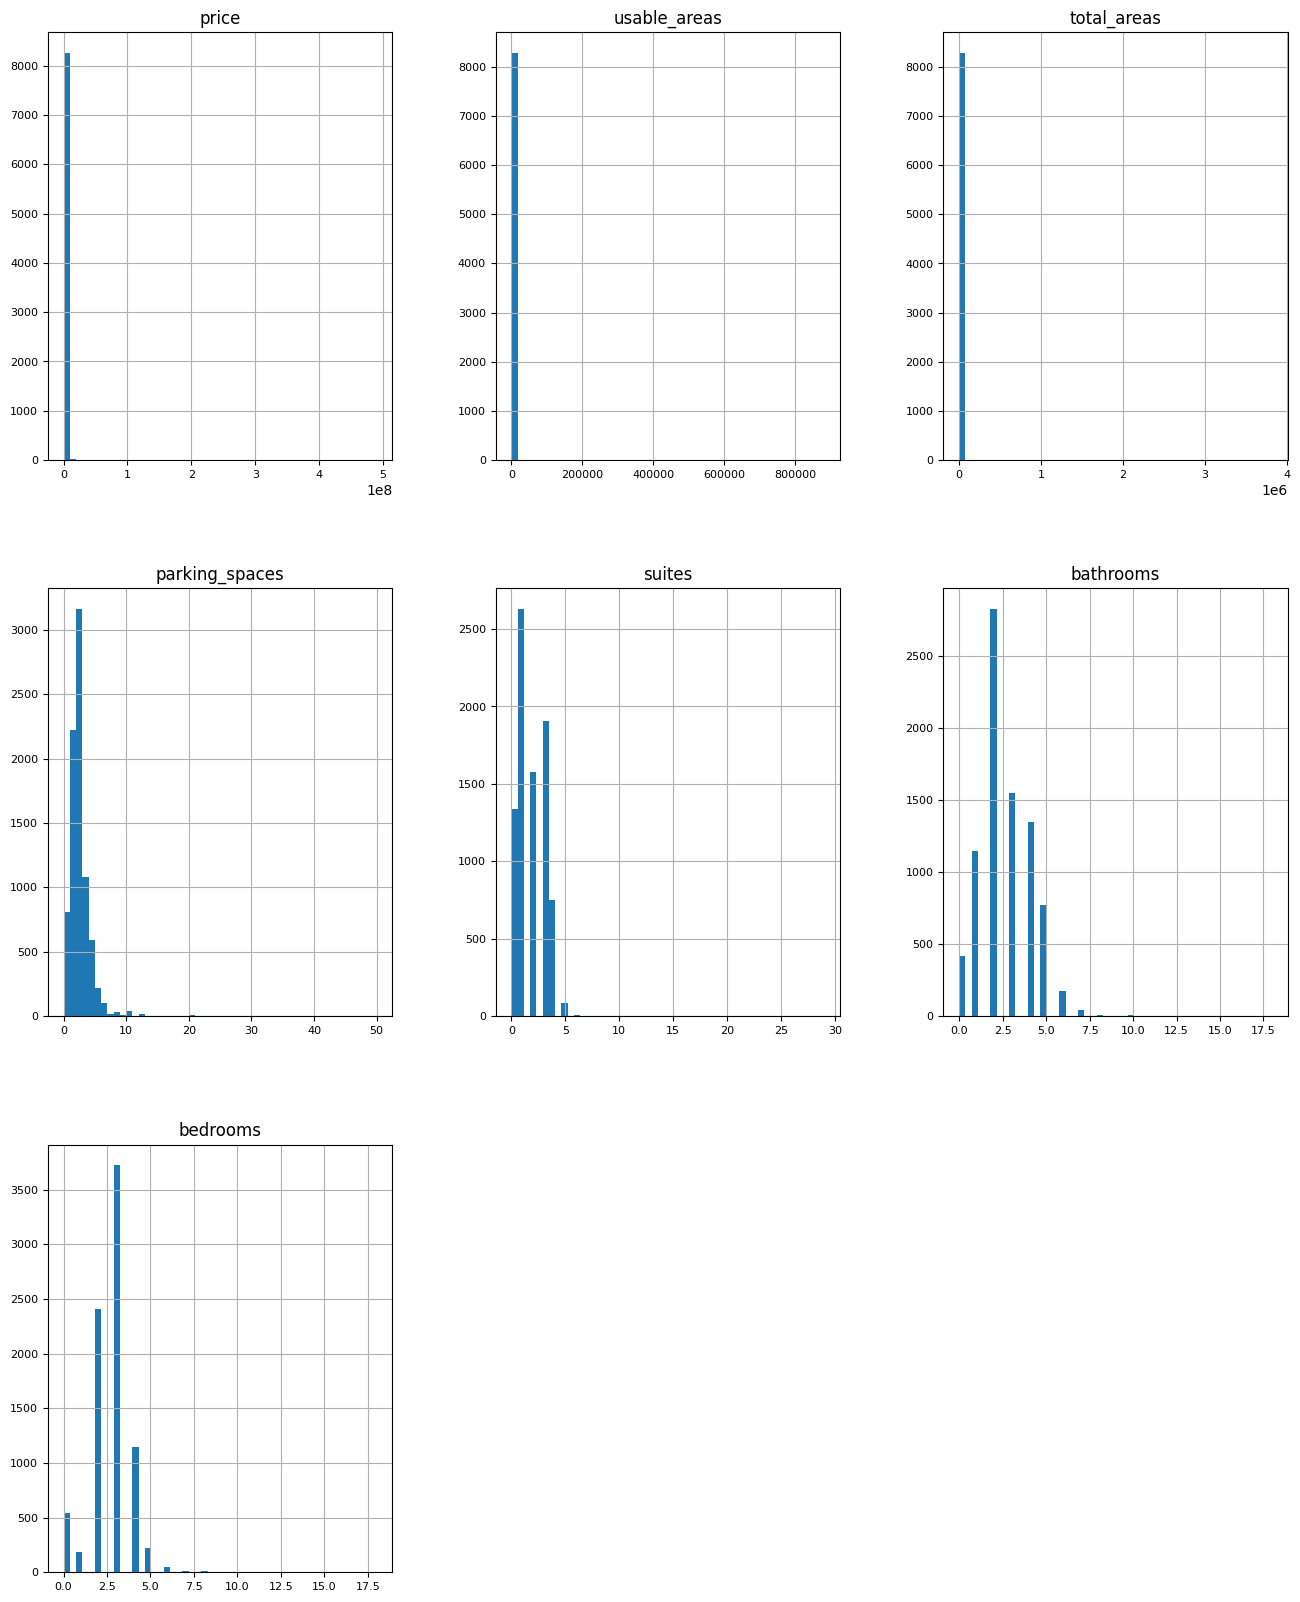

In [13]:
data[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Visualização dos histogramas no permite concluir que há grandes outliers nas
# variáveis price, usable_areas, total_areas

### Visualize Outliers

<img src="images/0_Zz3XmuErUXmIcy6C.webp" alt="Some Text" width="400" height="250">

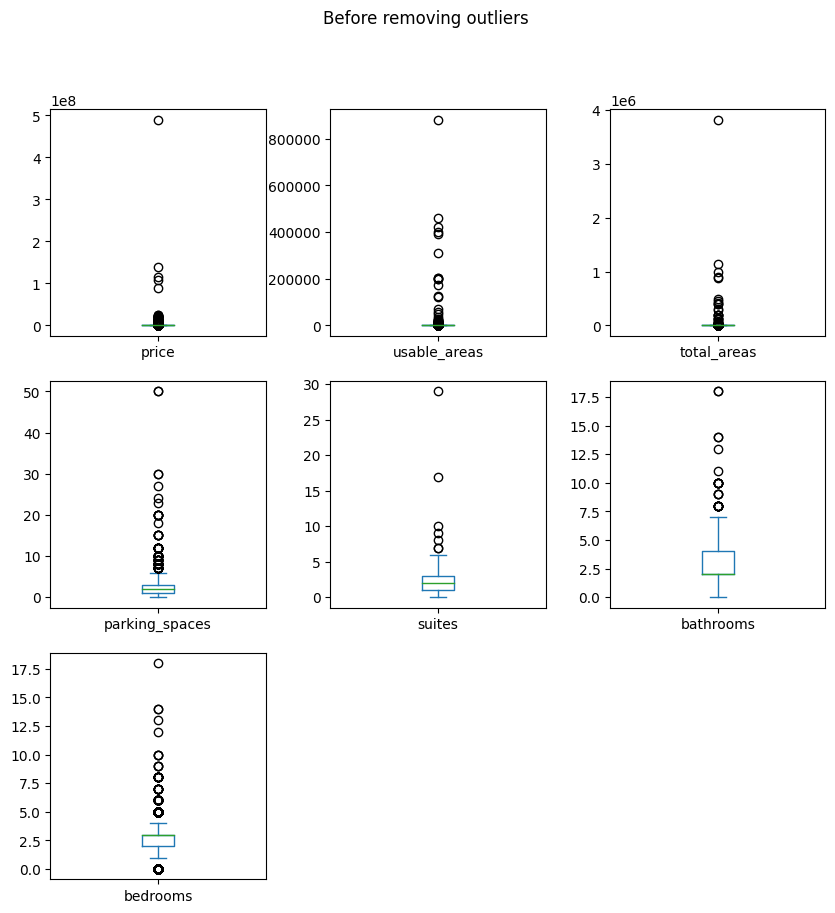

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Before removing outliers")
for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

In [15]:
# Specify the columns to remove outliers from
cols_to_clean = [
    "price",
    "usable_areas",
    "total_areas",
]

# Define the lower and upper bounds for filtering outliers
quantiles = data[cols_to_clean].quantile([0.05, 0.95])
lower_bound = quantiles.loc[0.05]
upper_bound = quantiles.loc[0.95]

# Filter out the outliers from each specified column
for col in cols_to_clean:
    data = data[(data[col] > lower_bound[col]) & (data[col] < upper_bound[col])]

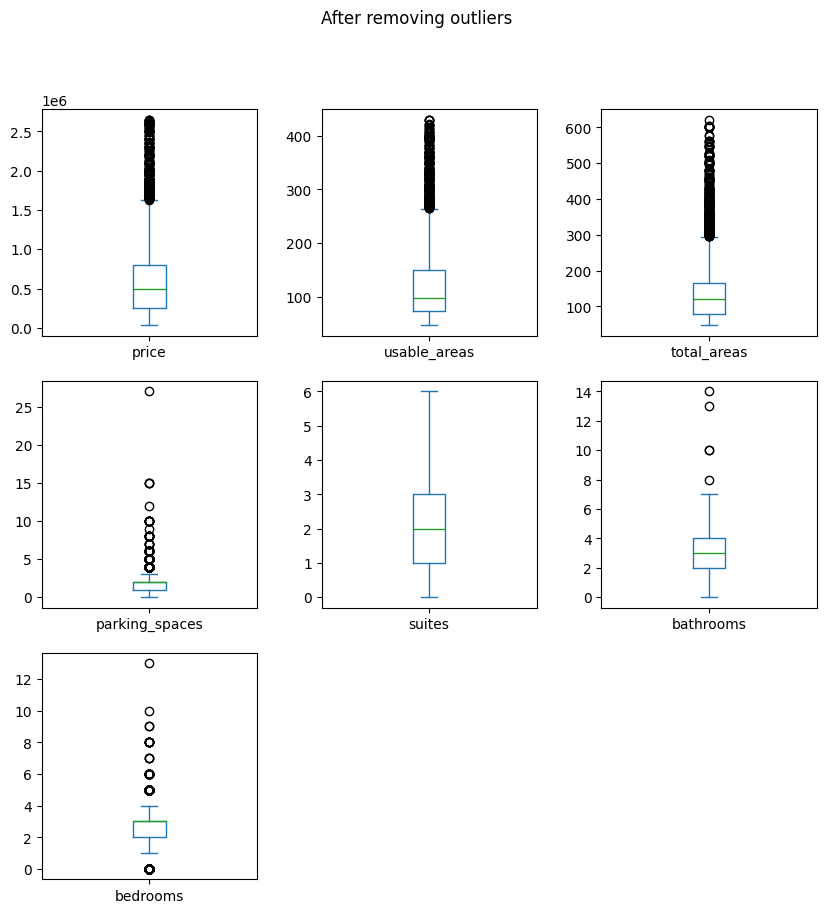

In [16]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)

fig.suptitle("After removing outliers")

for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create a StandardScaler object
scaler = StandardScaler()

# create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# select the columns to normalize/standardize
cols_to_standardize = [
    "usable_areas",
    "total_areas",
]
# cols_to_standardize = ["price"]
_data = data.copy()
# normalize the selected columns
_data[cols_to_standardize] = minmax_scaler.fit_transform(data[cols_to_standardize])

# # standardize the selected columns
# data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

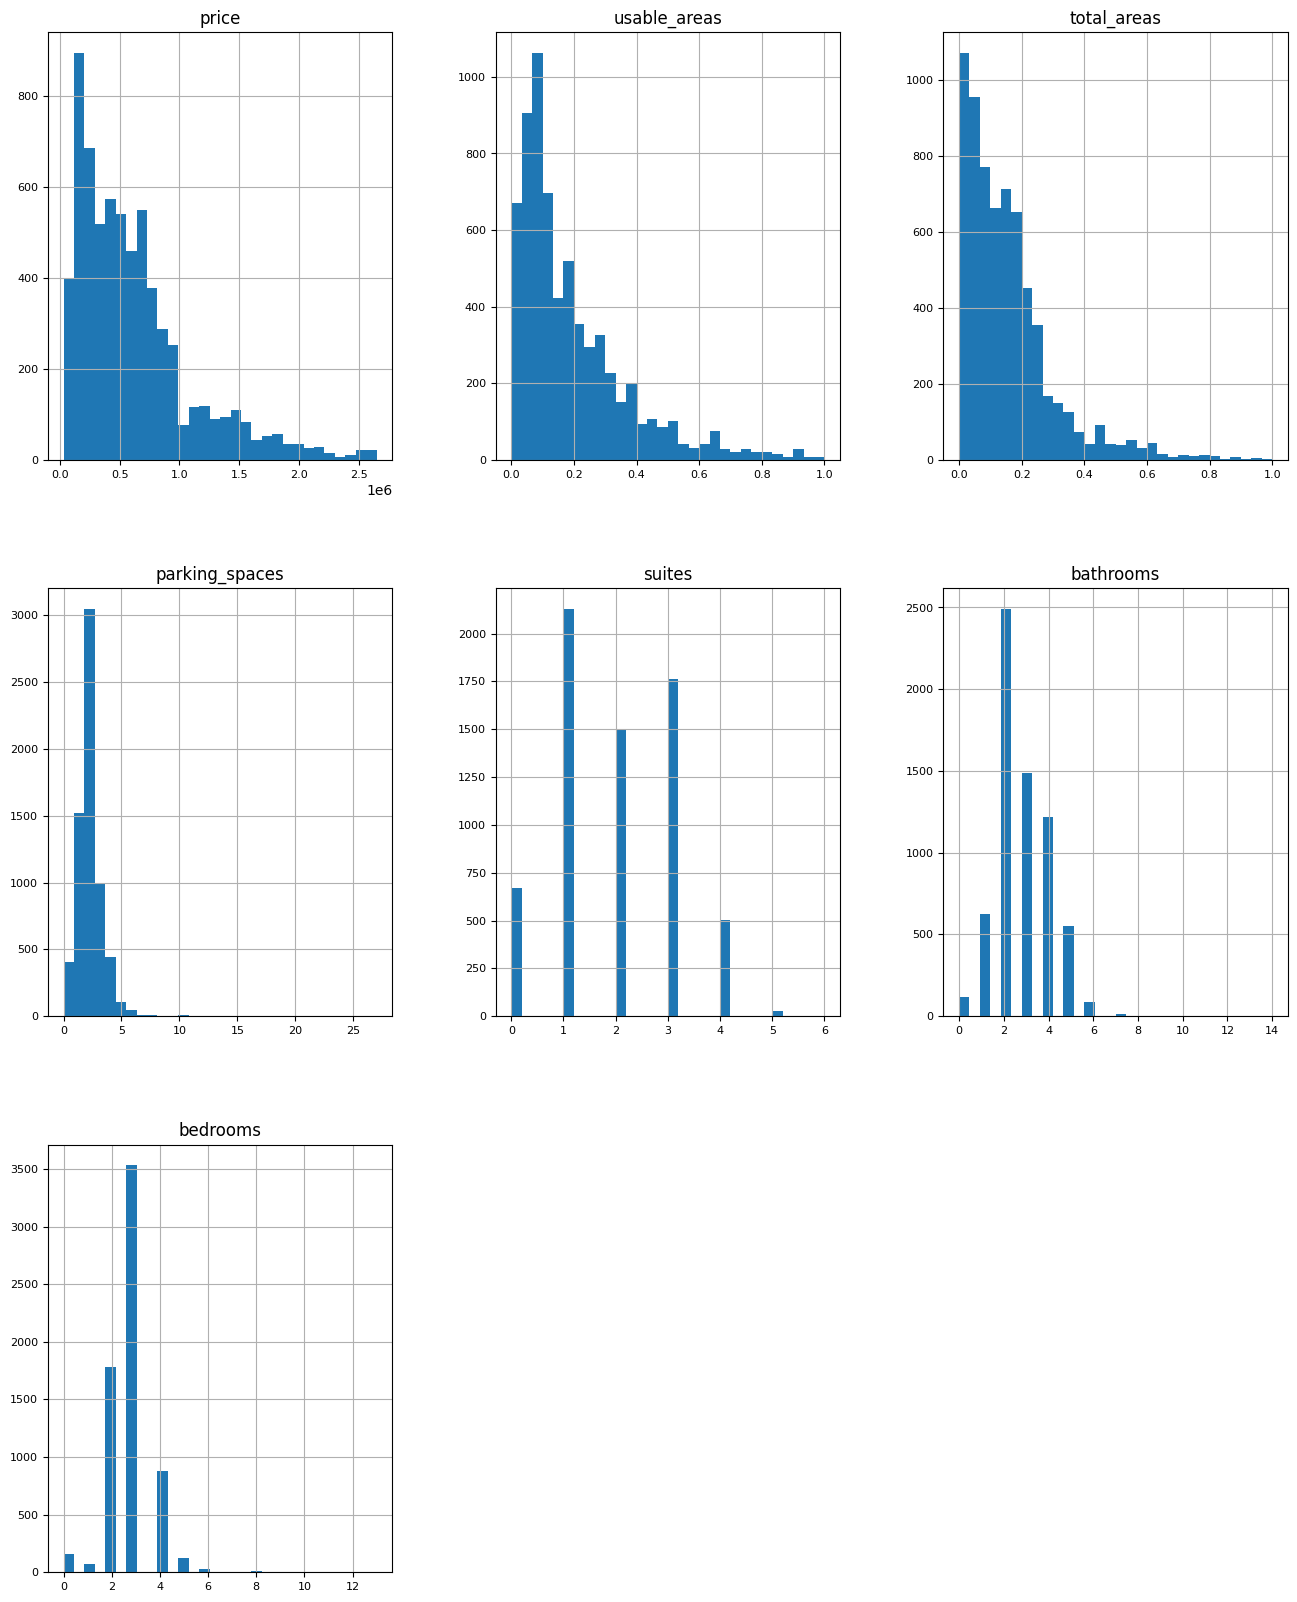

In [18]:
_data[numeric_cols].hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [19]:
data[numeric_cols]

,price,usable_areas,total_areas,parking_spaces,suites,bathrooms,bedrooms
1,705000,93,93,2,3,3,3
3,678417,54,54,1,2,2,2
5,330000,70,124,2,1,2,3
6,550000,160,160,3,4,4,4
7,650000,112,112,2,3,4,4
...,...,...,...,...,...,...,...
11577,52000,200,200,0,0,0,0
11581,62000,200,200,0,0,0,0
11598,1300000,237,390,4,3,5,4
11609,395560,396,396,0,0,0,0


<Axes: >

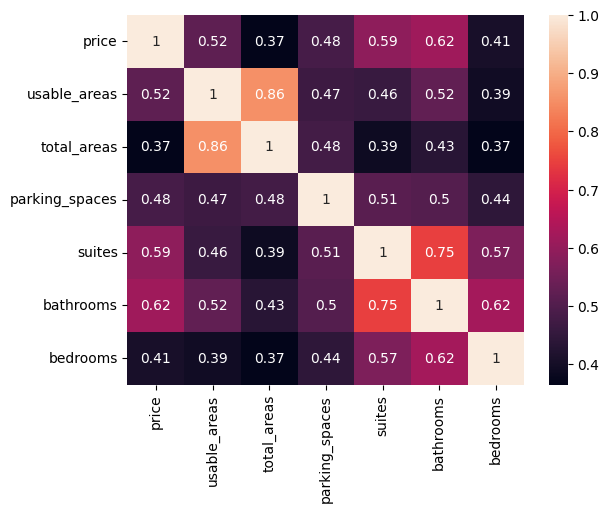

In [20]:
import seaborn as sns

sns.heatmap(data[numeric_cols].corr(), annot=True)

### Visualize Normal distribution

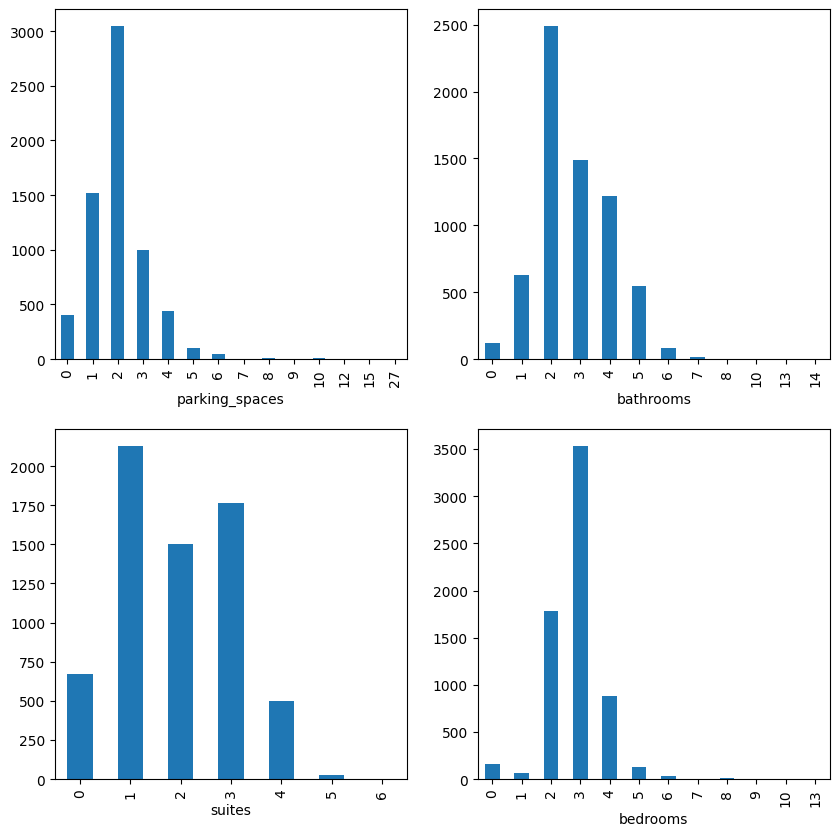

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
cols_to_plot = [
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
for i, col in enumerate(cols_to_plot):
    counts = data[col].value_counts().sort_index()
    counts.plot(kind="bar", ax=axes[i % 2, i // 2])
plt.show()

In [22]:
data["price_per_m2"] = data["price"] / data["usable_areas"]

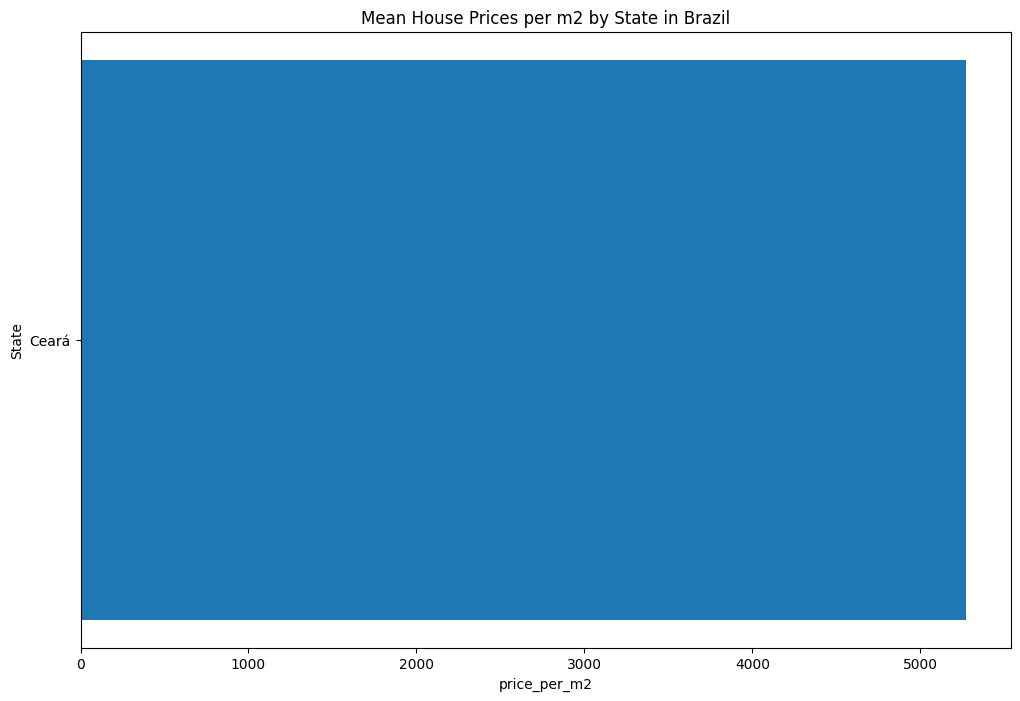

In [23]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("state")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["state"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by State in Brazil")
plt.show()

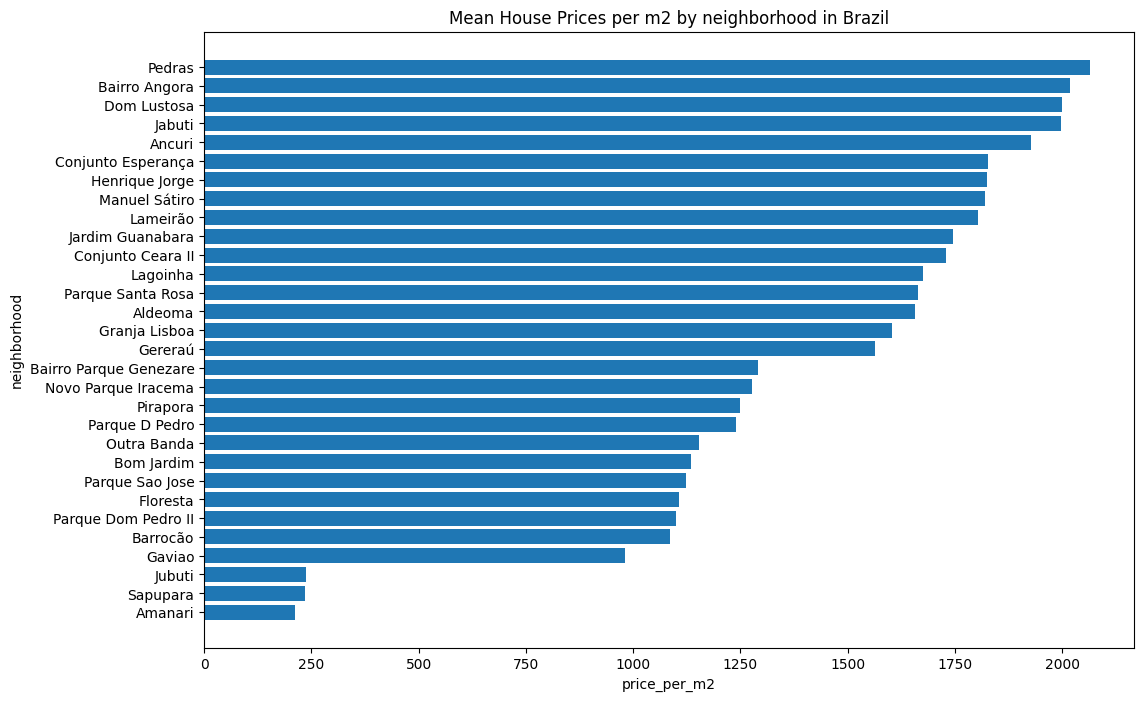

In [27]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("neighborhood")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True).head(30)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["neighborhood"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("neighborhood")
plt.title("Mean House Prices per m2 by neighborhood in Brazil")
plt.show()

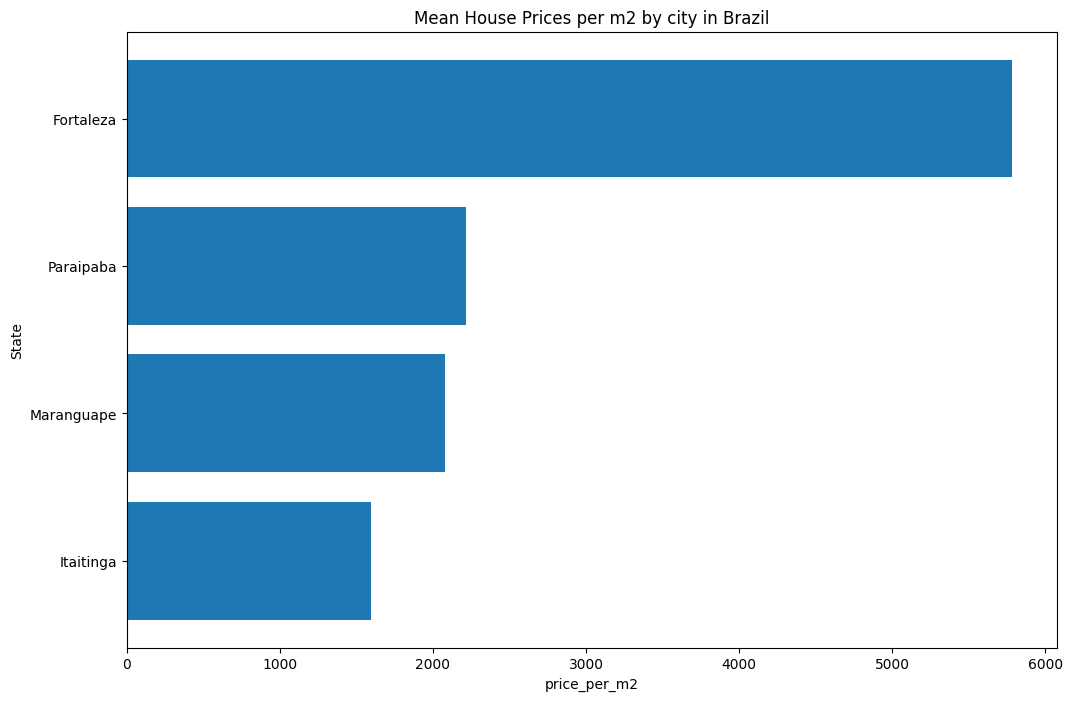

In [28]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("city")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["city"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by city in Brazil")
plt.show()

In [31]:
data["city"].unique()

array(['Fortaleza', 'Itaitinga', 'Maranguape', 'Paraipaba'], dtype=object)

#### 2D PCA 

In [32]:
from sklearn.decomposition import PCA

# Definir o número de componentes desejado
n_components = 2

# Aplicar o PCA
pca = PCA(n_components=n_components)
_data = data.drop(["price", "city", "state", "price_per_m2", "neighborhood"], axis=1)
pca_data = pca.fit_transform(_data)

In [33]:
pca_dataframe = pd.DataFrame(pca_data, columns=["pca1", "pca2"])
pca_dataframe["price"] = data["price"]

In [34]:
import plotly.express as px


# Create your plot
fig = px.scatter(pca_dataframe.head(100), x="pca1", y="pca2", color="price")
fig.show()

##### 3D PCA 

In [96]:
from sklearn.decomposition import PCA

# Definir o número de componentes desejado
n_components = 3

# Aplicar o PCA
pca = PCA(n_components=n_components)
_data = data.drop(
    ["price", "city", "state", "price_per_m2", "usable_areas", "neighborhood"], axis=1
)
pca_data = pca.fit_transform(_data)

In [97]:
pca_dataframe = pd.DataFrame(pca_data, columns=["pc1", "pc2", "pc3"])
pca_dataframe["price"] = data["price"]

In [98]:
# Create your plot
fig = px.scatter_3d(pca_dataframe.head(100), x="pc1", y="pc2", z="pc3", color="price")
fig.show()